In [1]:

import pandas as pd
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [57]:
dataset_path='https://frenzy86.s3.eu-west-2.amazonaws.com/python/penguins.csv'
df = pd.read_csv(dataset_path)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,male
1,Adelie,Torgersen,39.5,17.4,186,3800,female
2,Adelie,Torgersen,40.3,18.0,195,3250,female
3,Adelie,Torgersen,36.7,19.3,193,3450,female
4,Adelie,Torgersen,39.3,20.6,190,3650,male


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    int64  
 5   body_mass_g        333 non-null    int64  
 6   sex                333 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 18.3+ KB


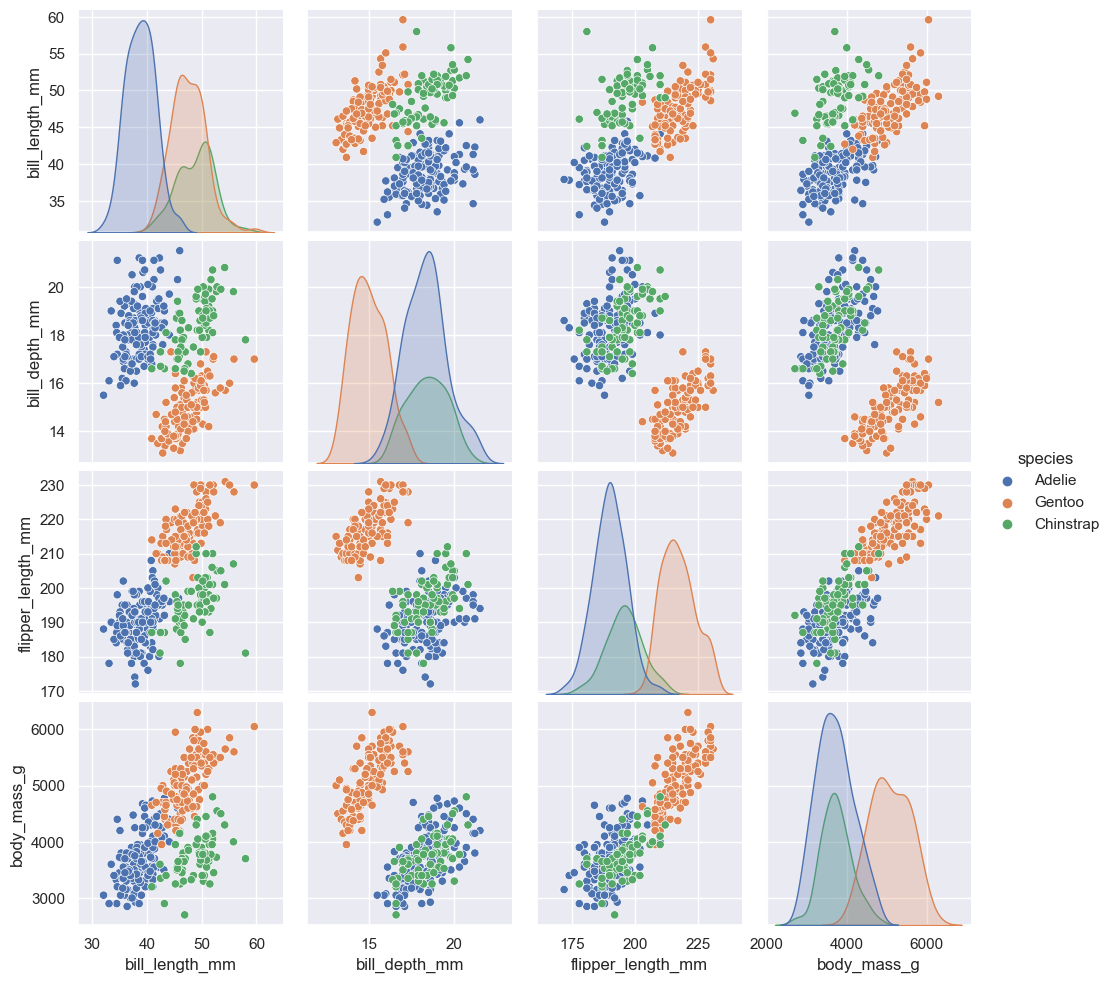

In [60]:
sns.pairplot(df, hue='species');

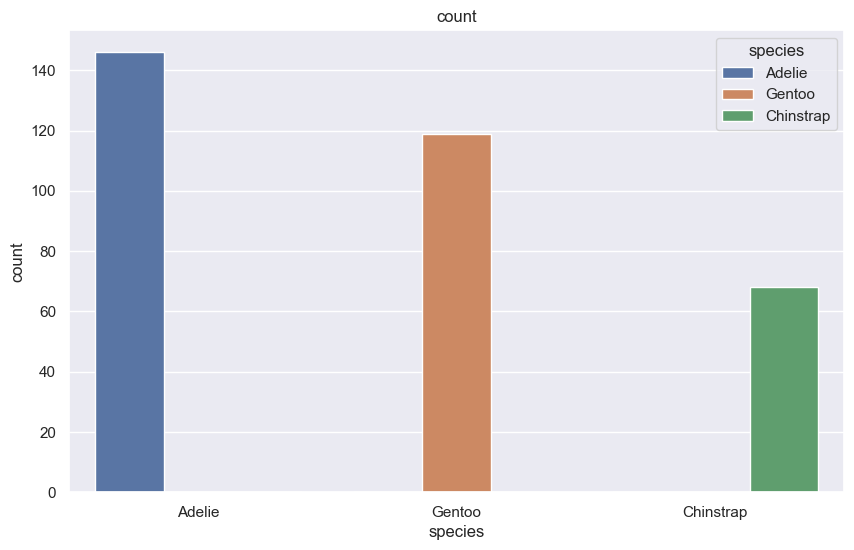

In [61]:
plt.figure(figsize=(10, 6))
plt.title('count')
sns.countplot(x='species', hue="species", data=df);

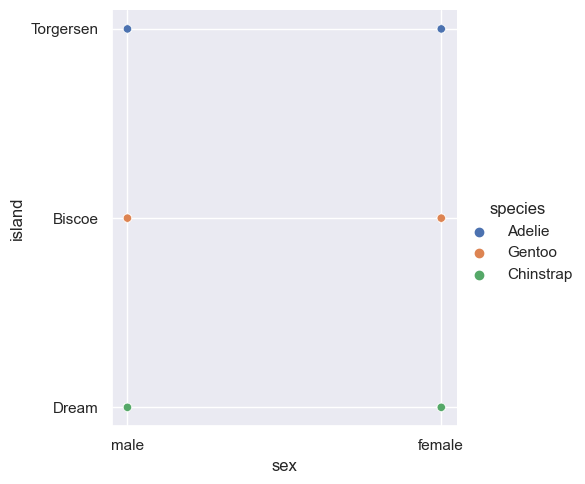

In [62]:
sns.relplot(x="sex", y="island",hue="species",
            data=df);

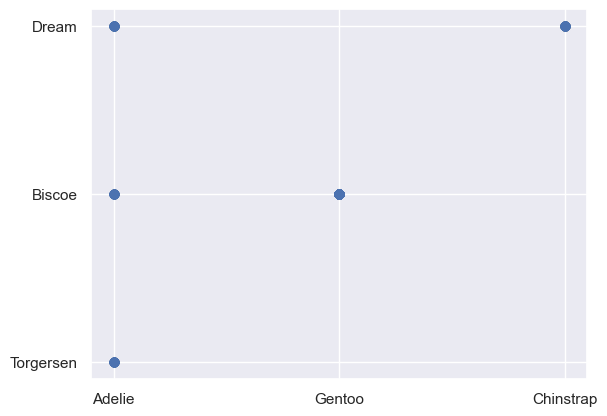

In [63]:
plt.scatter(df.species, df.island)

Text(0, 0.5, 'Count')

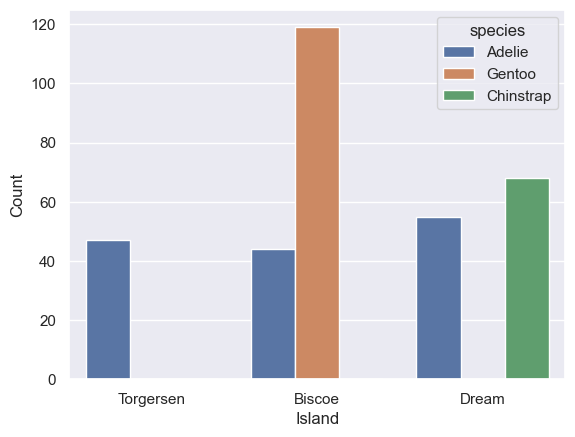

In [64]:
sns.countplot(x='island', hue='species', data=df)
plt.xlabel('Island')
plt.ylabel('Count')

In [65]:
X = df.drop(columns="species")

In [120]:
all = pd.get_dummies(df)

In [66]:
X = pd.get_dummies(X)

In [70]:
X

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,39.1,18.7,181,3750,0,0,1,0,1
1,39.5,17.4,186,3800,0,0,1,1,0
2,40.3,18.0,195,3250,0,0,1,1,0
3,36.7,19.3,193,3450,0,0,1,1,0
4,39.3,20.6,190,3650,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
328,55.8,19.8,207,4000,0,1,0,0,1
329,43.5,18.1,202,3400,0,1,0,1,0
330,49.6,18.2,193,3775,0,1,0,0,1
331,50.8,19.0,210,4100,0,1,0,0,1


In [68]:
y = df['species']

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.1, 
                                                    random_state = 667
                                                    )

In [113]:
model = LogisticRegression(fit_intercept=True)
model.fit(X_train, y_train)

LogisticRegression()

In [84]:
y_pred = model.predict(X_test)

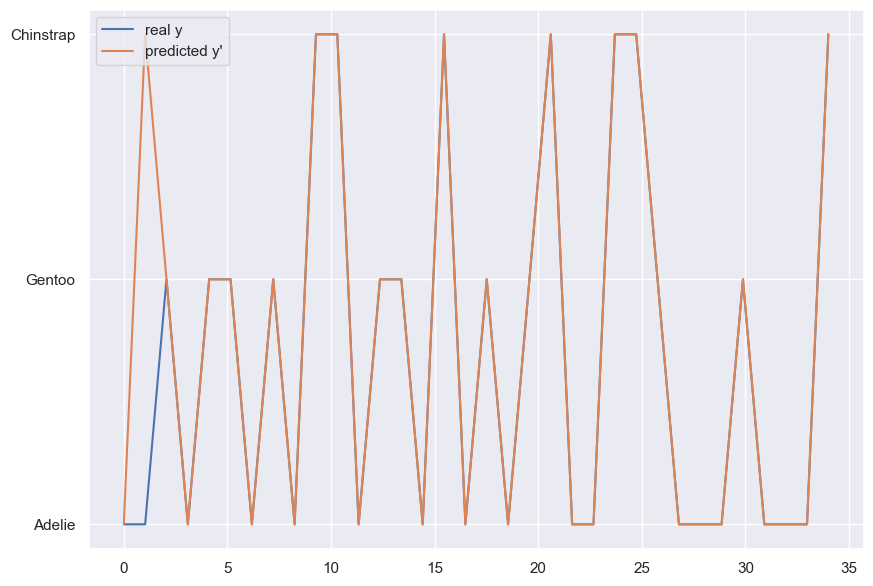

In [85]:
length = y_pred.shape[0] #  
x = np.linspace(0,length,length)

plt.figure(figsize=(10,7))
plt.plot(x, y_test, label='real y')
plt.plot(x, y_pred, label="predicted y'")
plt.legend(loc=2);

In [86]:


acc = accuracy_score(y_test, y_pred)
acc

0.9705882352941176

In [94]:
arr = np.array([36.7, 19.3, 193, 3450, 0, 0, 1, 1, 0])
arr = arr.reshape(-1,9)
model.predict(arr)[0]

c:\Users\ifoa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


'Adelie'

In [114]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)

In [115]:
scores

array([0.97014925, 0.98507463, 0.98507463, 1.        , 0.98484848])

In [116]:
acc = np.mean(scores)

In [117]:
acc

0.9850293984622344

<Axes: >

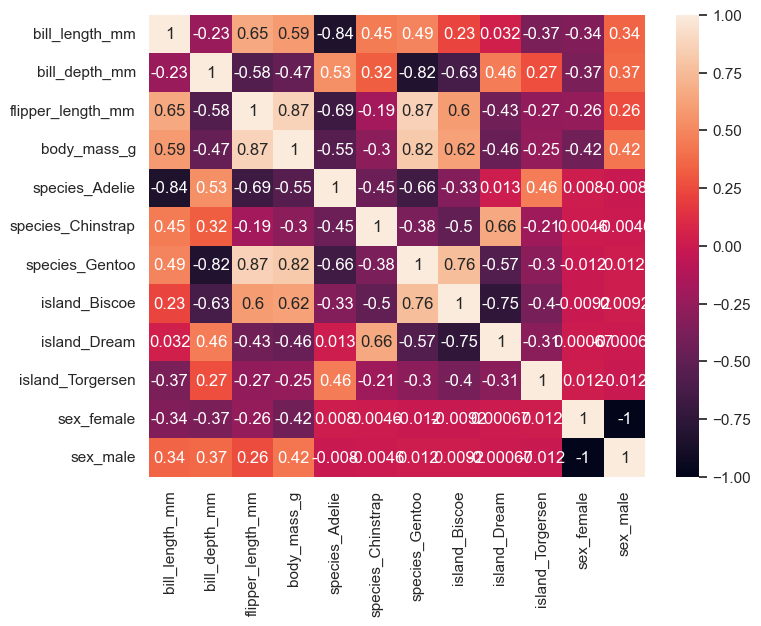

In [121]:
plt.figure(figsize=(8,6))
sns.heatmap(all.corr(), annot=True)

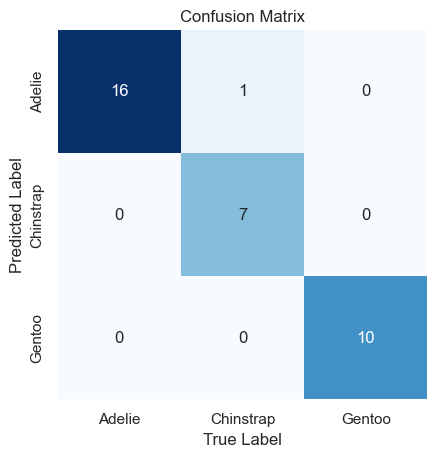

In [152]:
from sklearn.metrics import confusion_matrix
labels = y_test.sort_values().drop_duplicates().to_list()

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm , square=True, annot=True, cbar=False,cmap='Blues',xticklabels=labels,yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('True Label')
plt.ylabel('Predicted Label');